In [1]:
import pandas as pd

import collections

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

/home/kubicaj/python_venvs/pyEnv_PPI/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [106]:
def plot_neighbourhood(node, G, candidates):
    # plot the neighbourhood of the top node ENSG00000101773
    sub_G = G.subgraph([n for n in G.neighbors(node)])
    candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]

    sub_G = nx.Graph(sub_G) # unfreeze the graph
    sub_G.remove_edges_from(nx.selfloop_edges(sub_G)) # removing self-loops

    color_map = ['orangered' if node in candidates_in_neighbourhood else 'lightblue' for node in sub_G]


    plt.figure(figsize=(7, 6))
    ax = plt.gca()
    ax.set_title(f"Neighbourhood of {node}")
    nx.draw_networkx(sub_G, with_labels=False, node_size=100, alpha=0.9, ax=ax, node_color=color_map)
    _ = ax.axis('off')

In [104]:
interactome_df = pd.read_csv('./data/Interactome_human.tsv', sep='\t', header=None)
candidates = pd.read_pickle("./data/candidateGenesList.p")

G = nx.from_pandas_edgelist(interactome_df, 0, 1, edge_attr=True)

In [3]:
# number of proteins
len(G.nodes())

10215

In [4]:
# number of interactions
G.number_of_edges()

42351

In [5]:
# degree histogram
degrees = sorted([d for n, d in G.degree()])
deg, cnt = zip(*collections.Counter(degrees).items())

Text(0, 0.5, 'number of nodes')

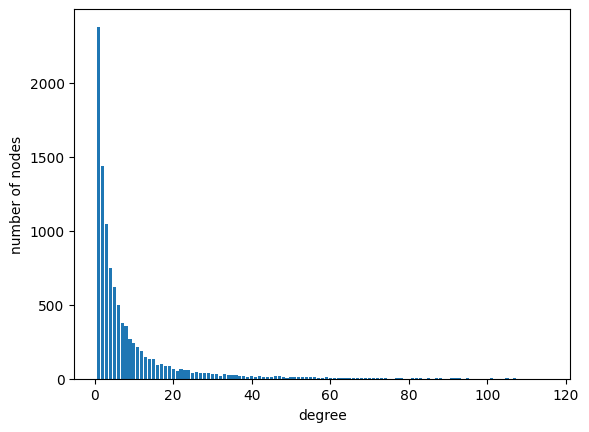

In [6]:
plt.bar(deg, cnt)
plt.xlabel("degree")
plt.ylabel("number of nodes")

### Count candidate genes for each node

In [101]:
# count candidate genes for each node
d = {}
for node in G.nodes():
    sub_G = G.subgraph([n for n in G.neighbors(node)])
    candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]
    candidates_in_neighbourhood_cnt = len(candidates_in_neighbourhood)
    d[node] = candidates_in_neighbourhood_cnt

In [102]:
s = pd.Series(d, name='# candidates in neighbourhood')
s.index.name = 'Gene'
s.reset_index()
s.sort_values(ascending=False)

Gene
ENSG00000101773    5
ENSG00000121989    4
ENSG00000174371    4
ENSG00000175054    4
ENSG00000164053    4
                  ..
ENSG00000142677    0
ENSG00000163599    0
ENSG00000198851    0
ENSG00000135636    0
ENSG00000137767    0
Name: # candidates in neighbourhood, Length: 10215, dtype: int64

Text(0, 0.5, 'number of nodes')

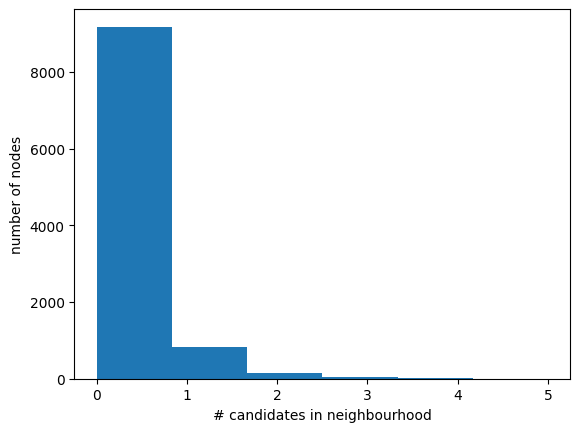

In [103]:
ax = s.plot.hist(bins=len(set(s.values)))
ax.set_xlabel("# candidates in neighbourhood")
ax.set_ylabel("number of nodes")

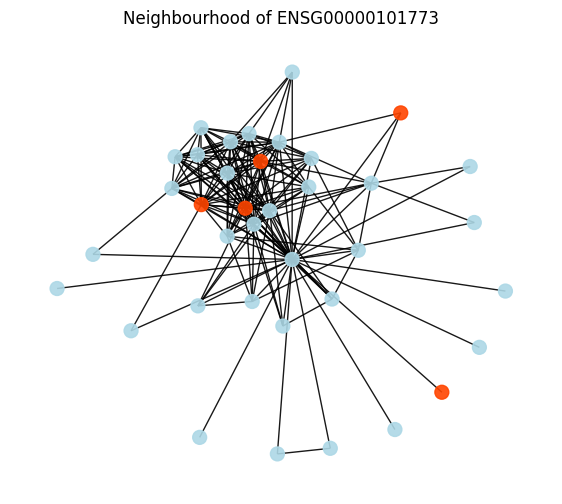

In [107]:
plot_neighbourhood("ENSG00000101773", G, candidates)

Information about ENSG00000101773:

Gene RBBP8

Protein Q99708 (endonuclease - DSB repair through HR; component of BRCA1-RBBP8)

In [53]:
# relation between the number of candidate genes vs degree
d = {}
for node in G.nodes():
    sub_G = G.subgraph([n for n in G.neighbors(node)])
    candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]
    candidates_in_neighbourhood_cnt = len(candidates_in_neighbourhood)
    d[node] = [candidates_in_neighbourhood_cnt, G.degree(node)]

In [51]:
df = pd.DataFrame.from_dict(d, orient='index', columns=['# candidates in neighbourhood', 'degree'])

<Axes: xlabel='degree', ylabel='# candidates in neighbourhood'>

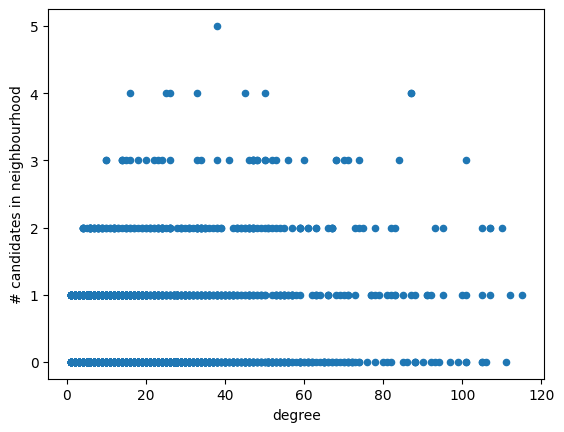

In [61]:
df.plot.scatter(x='degree', y='# candidates in neighbourhood')

### Score 1: Count candidate genes for each node and divide by node degree

In [84]:
# count candidate genes for each node and divide by node degree
d = {}
for node in G.nodes():
    sub_G = G.subgraph([n for n in G.neighbors(node)])
    candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]
    candidates_in_neighbourhood_cnt = len(candidates_in_neighbourhood)
    d[node] = candidates_in_neighbourhood_cnt / G.degree(node)

In [85]:
s = pd.Series(d, name='Score 1')
s.index.name = 'Gene'
s.reset_index()
s.sort_values(ascending=False)

Gene
ENSG00000089050    1.0
ENSG00000103150    1.0
ENSG00000137876    1.0
ENSG00000185504    1.0
ENSG00000135299    1.0
                  ... 
ENSG00000142677    0.0
ENSG00000163599    0.0
ENSG00000198851    0.0
ENSG00000135636    0.0
ENSG00000137767    0.0
Name: Score 1, Length: 10215, dtype: float64

Text(0, 0.5, 'number of nodes')

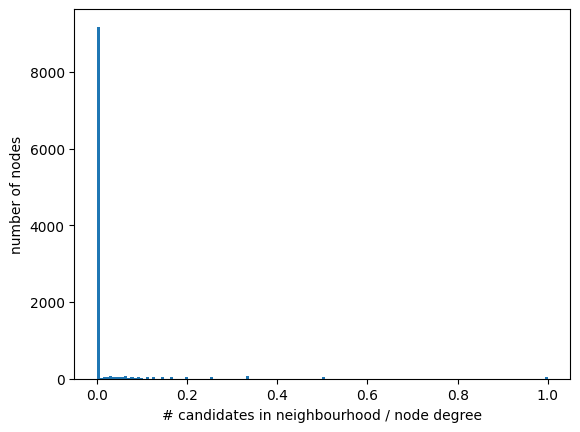

In [94]:
ax = s.plot.hist(bins=len(set(s.values)))
ax.set_xlabel("# candidates in neighbourhood / node degree")
ax.set_ylabel("number of nodes")

In [95]:
# count candidate genes for each node and divide by node degree
# get more node info
d = {}
for node in G.nodes():
    sub_G = G.subgraph([n for n in G.neighbors(node)])
    candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]
    candidates_in_neighbourhood_cnt = len(candidates_in_neighbourhood)
    d[node] = [candidates_in_neighbourhood_cnt / G.degree(node), candidates_in_neighbourhood_cnt, G.degree(node)]

In [99]:
df = pd.DataFrame.from_dict(d, orient='index', columns=['score 1', '# candidates in neighbourhood', 'degree'])
df.head()

,score 1,# candidates in neighbourhood,degree
ENSG00000065559,0.0,0,10
ENSG00000128591,0.0,0,13
ENSG00000077522,0.0,0,38
ENSG00000138347,0.0,0,4
ENSG00000179348,0.0,0,6
